<a href="https://colab.research.google.com/github/LerinaMM/satisfacao_consumidor_aneel/blob/main/aneel_ouvidoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -P "/content/drive/MyDrive/Datasets/aneel/ouvidoria-aneel-2022.csv"

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/Datasets/aneel/ouvidoria-aneel-2022.csv', encoding='latin-1', delimiter=';')

In [4]:
dados.head()

,DatGeracaoConjuntoDados,SigAgente,NumCPFCNPJAgente,SigUF,CodigoMunicipio,NomMunicipio,NomCategoria,NomSubCategoria,NomTipologia,NomDecisao,DscSituacao,DtCriacao,NumQtdReclamacoesDia
0,2023-08-01,Energisa AC,4065033000170,AC,1200450,Senador Guiomard,Informação,Atendimento,Atend Digital,Sem decisão,Finalizada por Script,2022-12-02,1
1,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Informação,Atendimento,Atend Telefônico,Sem decisão,Finalizada por Script,2022-10-04,1
2,2023-08-01,Energisa AC,4065033000170,AC,1200203,Cruzeiro do Sul,Informação,Cobranças,Cobrança Irregularidades,Sem decisão,Encerrada,2022-08-05,1
3,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Informação,Atendimento,Atend Presencial,Sem decisão,Finalizada por Script,2022-02-10,1
4,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Informação,Cobranças,Cobrança Irregularidades,Sem decisão,Encerrada,2022-04-15,1


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471835 entries, 0 to 471834
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   DatGeracaoConjuntoDados  471835 non-null  object
 1   SigAgente                471835 non-null  object
 2   NumCPFCNPJAgente         471835 non-null  int64 
 3   SigUF                    471835 non-null  object
 4   CodigoMunicipio          471835 non-null  int64 
 5   NomMunicipio             471833 non-null  object
 6   NomCategoria             471833 non-null  object
 7   NomSubCategoria          471835 non-null  object
 8   NomTipologia             471833 non-null  object
 9   NomDecisao               471835 non-null  object
 10  DscSituacao              471835 non-null  object
 11  DtCriacao                471835 non-null  object
 12  NumQtdReclamacoesDia     471835 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 46.8+ MB


In [6]:
dados.duplicated().sum()

0

In [7]:
dados.isnull().sum()

DatGeracaoConjuntoDados    0
SigAgente                  0
NumCPFCNPJAgente           0
SigUF                      0
CodigoMunicipio            0
NomMunicipio               2
NomCategoria               2
NomSubCategoria            0
NomTipologia               2
NomDecisao                 0
DscSituacao                0
DtCriacao                  0
NumQtdReclamacoesDia       0
dtype: int64

In [8]:
dados.shape

(471835, 13)

In [9]:
# Obter a primeira e a última data do dataset

primeira_data = dados['DtCriacao'].min()
ultima_data = dados['DtCriacao'].max()

print('Primeira data:', primeira_data)
print('Última data:', ultima_data)

Primeira data: 2022-01-01
Última data: 2022-12-31


In [10]:
dados['NomCategoria'].value_counts()

Informação          322615
Reclamações         148283
Denúncias              760
Sugestão/Crítica       123
Elogio                  52
Name: NomCategoria, dtype: int64

In [11]:
dados['NomSubCategoria'].value_counts()

Qualidade do Fornecimento    131020
Serviços Comerciais          102998
Faturamento                   72001
Cobranças                     69989
Serviços Técnicos             65466
Atendimento                   22521
Outros                         6905
Denúncias                       760
Sugestão/Crítica                123
Elogio                           52
Name: NomSubCategoria, dtype: int64

In [12]:
dados['DscSituacao'].value_counts()

Finalizada por Script                           308590
Encerrada distribuidora                          99076
Encerrada                                        63858
Reiterada                                          181
Novos Questionamentos à Concessionária              61
Em tramitação/Análise/Avaliação pela Agencia        31
Retorno da Concessionária                           25
Retorno para GAO                                     9
Aguarda Resposta Concessionária                      2
Devolvida à Concessionária                           1
Redistribuição manual                                1
Name: DscSituacao, dtype: int64

In [13]:
dados.groupby('NomCategoria')[['NomSubCategoria']].value_counts()

NomCategoria      NomSubCategoria          
Denúncias         Denúncias                      760
Elogio            Elogio                          52
Informação        Qualidade do Fornecimento    91971
                  Serviços Comerciais          78496
                  Cobranças                    53745
                  Faturamento                  41999
                  Serviços Técnicos            31842
                  Atendimento                  18097
                  Outros                        6465
Reclamações       Qualidade do Fornecimento    39049
                  Serviços Técnicos            33624
                  Faturamento                  30002
                  Serviços Comerciais          24502
                  Cobranças                    16244
                  Atendimento                   4424
                  Outros                         438
Sugestão/Crítica  Sugestão/Crítica               123
dtype: int64

In [14]:
dados.groupby('NomCategoria')[['NomSubCategoria',"DscSituacao"]].value_counts().apply(lambda x:x/(len(dados))*100).sort_values(ascending=False).nlargest(10).reset_index()

,NomCategoria,NomSubCategoria,DscSituacao,0
0,Informação,Qualidade do Fornecimento,Finalizada por Script,18.999438
1,Informação,Serviços Comerciais,Finalizada por Script,16.163913
2,Informação,Cobranças,Finalizada por Script,11.023557
3,Informação,Faturamento,Finalizada por Script,8.374962
4,Informação,Serviços Técnicos,Finalizada por Script,6.023080
5,Reclamações,Qualidade do Fornecimento,Encerrada,5.493234
6,Reclamações,Serviços Técnicos,Encerrada distribuidora,4.932233
7,Reclamações,Serviços Comerciais,Encerrada distribuidora,4.728348
8,Reclamações,Faturamento,Encerrada distribuidora,4.695709
9,Informação,Atendimento,Finalizada por Script,3.730118


In [15]:
dados.groupby('NomCategoria')[['NomSubCategoria']].value_counts().apply(lambda x:x/(len(dados))*100)

NomCategoria      NomSubCategoria          
Denúncias         Denúncias                     0.161073
Elogio            Elogio                        0.011021
Informação        Qualidade do Fornecimento    19.492195
                  Serviços Comerciais          16.636324
                  Cobranças                    11.390634
                  Faturamento                   8.901205
                  Serviços Técnicos             6.748546
                  Atendimento                   3.835451
                  Outros                        1.370182
Reclamações       Qualidade do Fornecimento     8.275986
                  Serviços Técnicos             7.126220
                  Faturamento                   6.358579
                  Serviços Comerciais           5.192917
                  Cobranças                     3.442729
                  Atendimento                   0.937616
                  Outros                        0.092829
Sugestão/Crítica  Sugestão/Crítica          

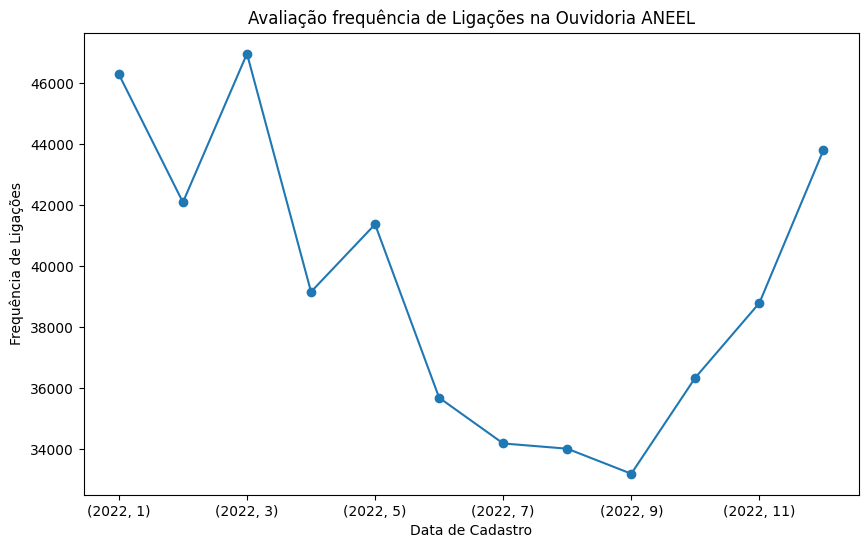

In [16]:
# Transformando a coluna 'DtCriacao' está no formato datetime

dados['DtCriacao'] = pd.to_datetime(dados['DtCriacao'])

# Extração do ano e o mês da coluna 'Data_de_cadastro'

dados['ano'] = dados['DtCriacao'].dt.year
dados['mes'] = dados['DtCriacao'].dt.month
dados['dia'] = dados['DtCriacao'].dt.day

# Contagem do número de denúncias em cada mês
frequencia_ligacoes = dados.groupby(['ano', 'mes']).size()

# Criação de um gráfico de linha para visualizar a frequência de denúncias ao longo do tempo

plt.figure(figsize=(10, 6))
frequencia_ligacoes.plot(kind='line', marker='o')
plt.xlabel('Data de Cadastro')
plt.ylabel('Frequência de Ligações')
plt.title('Avaliação frequência de Ligações na Ouvidoria ANEEL')
plt.show()

In [17]:
dados.head()

,DatGeracaoConjuntoDados,SigAgente,NumCPFCNPJAgente,SigUF,CodigoMunicipio,NomMunicipio,NomCategoria,NomSubCategoria,NomTipologia,NomDecisao,DscSituacao,DtCriacao,NumQtdReclamacoesDia,ano,mes,dia
0,2023-08-01,Energisa AC,4065033000170,AC,1200450,Senador Guiomard,Informação,Atendimento,Atend Digital,Sem decisão,Finalizada por Script,2022-12-02,1,2022,12,2
1,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Informação,Atendimento,Atend Telefônico,Sem decisão,Finalizada por Script,2022-10-04,1,2022,10,4
2,2023-08-01,Energisa AC,4065033000170,AC,1200203,Cruzeiro do Sul,Informação,Cobranças,Cobrança Irregularidades,Sem decisão,Encerrada,2022-08-05,1,2022,8,5
3,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Informação,Atendimento,Atend Presencial,Sem decisão,Finalizada por Script,2022-02-10,1,2022,2,10
4,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Informação,Cobranças,Cobrança Irregularidades,Sem decisão,Encerrada,2022-04-15,1,2022,4,15


In [18]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471835 entries, 0 to 471834
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DatGeracaoConjuntoDados  471835 non-null  object        
 1   SigAgente                471835 non-null  object        
 2   NumCPFCNPJAgente         471835 non-null  int64         
 3   SigUF                    471835 non-null  object        
 4   CodigoMunicipio          471835 non-null  int64         
 5   NomMunicipio             471833 non-null  object        
 6   NomCategoria             471833 non-null  object        
 7   NomSubCategoria          471835 non-null  object        
 8   NomTipologia             471833 non-null  object        
 9   NomDecisao               471835 non-null  object        
 10  DscSituacao              471835 non-null  object        
 11  DtCriacao                471835 non-null  datetime64[ns]
 12  NumQtdReclamacoe

#3. Empresas que mais são citadas na ouvidoria

In [19]:
dados['SigAgente'].value_counts().head(20)

Cemig                    44921
Neoenergia Coelba        43724
Enel GO                  38008
Enel CE                  34093
Neoenergia Pernambuco    32785
Enel SP                  32094
Enel RJ                  30814
Light                    22063
CPFL Paulista            21262
CEEE Equatorial          19081
Equatorial PA            15743
RGE                      15562
Neoenergia Elektro       12320
Copel                    12093
EDP SP                   11333
CPFL Piratininga         10333
Equatorial AL             8735
Amazonas Energia          8445
Neoenergia Brasília       7253
Neoenergia Cosern         7149
Name: SigAgente, dtype: int64

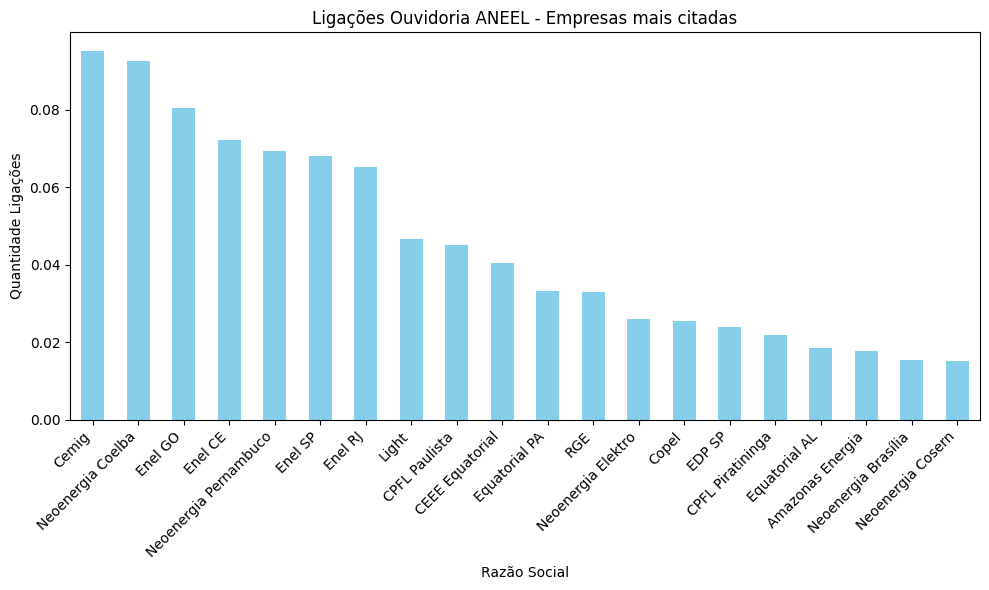

In [20]:
# Verificando a frequencia de Ligações a Ouvidoria da Aneel

# Conte a frequência de cada canal de atendimento
quantidade_ouvidoria = dados['SigAgente'].value_counts(10)

# Crie um gráfico de barras para visualizar a frequência de reclamacao dos planos
plt.figure(figsize=(10, 6))
quantidade_ouvidoria.head(20).plot(kind='bar', color='skyblue')
plt.title('Ligações Ouvidoria ANEEL - Empresas mais citadas')
plt.xlabel('Razão Social')
plt.ylabel('Quantidade Ligações')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
dados.groupby('SigAgente')[['NomCategoria']].value_counts().apply(lambda x:x/(len(dados))*100)

SigAgente         NomCategoria    
Amazonas Energia  Informação          1.447964
                  Reclamações         0.339314
                  Denúncias           0.002331
                  Sugestão/Crítica    0.000212
CEA Equatorial    Informação          0.168491
                                        ...   
Roraima Energia   Reclamações         0.030943
Santa Maria       Informação          0.010809
                  Reclamações         0.004875
Sulgipe           Informação          0.022465
                  Reclamações         0.007206
Length: 195, dtype: float64

# Filtrando somente as ligações referentes a reclamações

In [22]:
dados.query('NomCategoria == "Reclamações"')

,DatGeracaoConjuntoDados,SigAgente,NumCPFCNPJAgente,SigUF,CodigoMunicipio,NomMunicipio,NomCategoria,NomSubCategoria,NomTipologia,NomDecisao,DscSituacao,DtCriacao,NumQtdReclamacoesDia,ano,mes,dia
183,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Reclamações,Cobranças,Cobrança Indevida,Sem decisão,Encerrada distribuidora,2022-02-15,1,2022,2,15
191,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Reclamações,Cobranças,Cobrança Irregularidades,Improcedente,Encerrada,2022-08-04,1,2022,8,4
197,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Reclamações,Atendimento,Nenhuma das Anteriores,Sem decisão,Encerrada distribuidora,2022-06-09,1,2022,6,9
199,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Reclamações,Cobranças,Cobrança Irregularidades,Improcedente,Encerrada,2022-08-30,1,2022,8,30
205,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Reclamações,Cobranças,Cobrança Irregularidades,Improcedente,Encerrada,2022-01-12,1,2022,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471830,2023-08-01,Amazonas Energia,2341467000120,AM,1302603,Manaus,Reclamações,Serviços Técnicos,Conexão Microgeração,Sem decisão,Encerrada distribuidora,2022-12-26,2,2022,12,26
471831,2023-08-01,Amazonas Energia,2341467000120,AM,1302603,Manaus,Reclamações,Serviços Técnicos,Nenhuma das Anteriores,Sem decisão,Encerrada distribuidora,2022-10-11,1,2022,10,11
471832,2023-08-01,Amazonas Energia,2341467000120,AM,1302603,Manaus,Reclamações,Serviços Técnicos,Poda de Árvore,Sem decisão,Encerrada distribuidora,2022-04-05,1,2022,4,5
471833,2023-08-01,Amazonas Energia,2341467000120,AM,1302603,Manaus,Reclamações,Serviços Técnicos,Poste em Mau Estado,Sem decisão,Encerrada distribuidora,2022-12-15,1,2022,12,15


In [23]:
reclamacoes = dados.query('NomCategoria == "Reclamações"')

In [24]:
reclamacoes.head()

,DatGeracaoConjuntoDados,SigAgente,NumCPFCNPJAgente,SigUF,CodigoMunicipio,NomMunicipio,NomCategoria,NomSubCategoria,NomTipologia,NomDecisao,DscSituacao,DtCriacao,NumQtdReclamacoesDia,ano,mes,dia
183,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Reclamações,Cobranças,Cobrança Indevida,Sem decisão,Encerrada distribuidora,2022-02-15,1,2022,2,15
191,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Reclamações,Cobranças,Cobrança Irregularidades,Improcedente,Encerrada,2022-08-04,1,2022,8,4
197,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Reclamações,Atendimento,Nenhuma das Anteriores,Sem decisão,Encerrada distribuidora,2022-06-09,1,2022,6,9
199,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Reclamações,Cobranças,Cobrança Irregularidades,Improcedente,Encerrada,2022-08-30,1,2022,8,30
205,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Reclamações,Cobranças,Cobrança Irregularidades,Improcedente,Encerrada,2022-01-12,1,2022,1,12


#Agora vamos verificar se as companhias continuam as mesmas que recebem mais ligações na ouvidoria classificando por "reclamações

In [25]:
reclamacoes['SigAgente'].value_counts().head(20)

Cemig                    18749
Enel RJ                  17494
Neoenergia Coelba        14125
Enel SP                  12825
Light                    12180
Enel CE                   7976
Enel GO                   6627
Neoenergia Pernambuco     6039
CEEE Equatorial           5391
CPFL Paulista             4867
Equatorial PA             4170
RGE                       3442
Neoenergia Elektro        3282
Equatorial PI             2894
Copel                     2641
EDP SP                    2515
Equatorial AL             2317
Neoenergia Brasília       2167
CPFL Piratininga          2085
EDP ES                    1798
Name: SigAgente, dtype: int64

In [ ]:
# Verificando a frequencia de Ligações a Ouvidoria da Aneel

# Conte a frequência de cada canal de atendimento
quantidade_ouvidoria = dados['SigAgente'].value_counts(10)

# Crie um gráfico de barras para visualizar a frequência de reclamacao dos planos
plt.figure(figsize=(10, 6))
quantidade_ouvidoria.head(20).plot(kind='bar', color='skyblue')
plt.title('Ligações Ouvidoria ANEEL - Empresas mais citadas')
plt.xlabel('Razão Social')
plt.ylabel('Quantidade Ligações')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()